In [16]:
from __future__ import division
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

import pycwt as wavelet
from pycwt.helpers import find

In [17]:
sp_filtrado = pd.read_excel('spF_normalizado.xlsx')
dat = sp_filtrado['Valores de SP medio filtrado e normalizado']

title = 'Número de SP medio por mês'
label = 'Números de SP medio'
units = 'Unidade'

t0 = (2012 + 1/12) # Ano-Mês inicial
dt = (1)/(12) # Intervalos de 1 mês
N = dat.size
t = np.arange(0,N) * dt + t0

In [18]:
# Transformada da filtrada

mother = wavelet.Morlet(6)
s0 = 1 * dt # Escala inicial
dj = 1 / 100
J = 7 / dj 
dat = np.array(dat)
alpha, _, _ = wavelet.ar1(dat)

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat, dt, dj, s0, J, mother)
# Inversa
std = dat.std()
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

print(len(freqs))

701


In [19]:
# espectro de potencia
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = (1 / freqs) 
# retifica
power /= scales[:, None]

# teste de significancia do espectro de potencia # INCOMPLETO
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [20]:
# fft_SP = pd.DataFrame(fftfreqs, columns=['fft SP'])
# fft_SP.to_excel('testando_fftSP.xlsx')

C:\Users\Morgan\AppData\Local\Temp\ipykernel_7868\1550810815.py:19: UserWarning: No contour levels were found within the data range.
  bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,


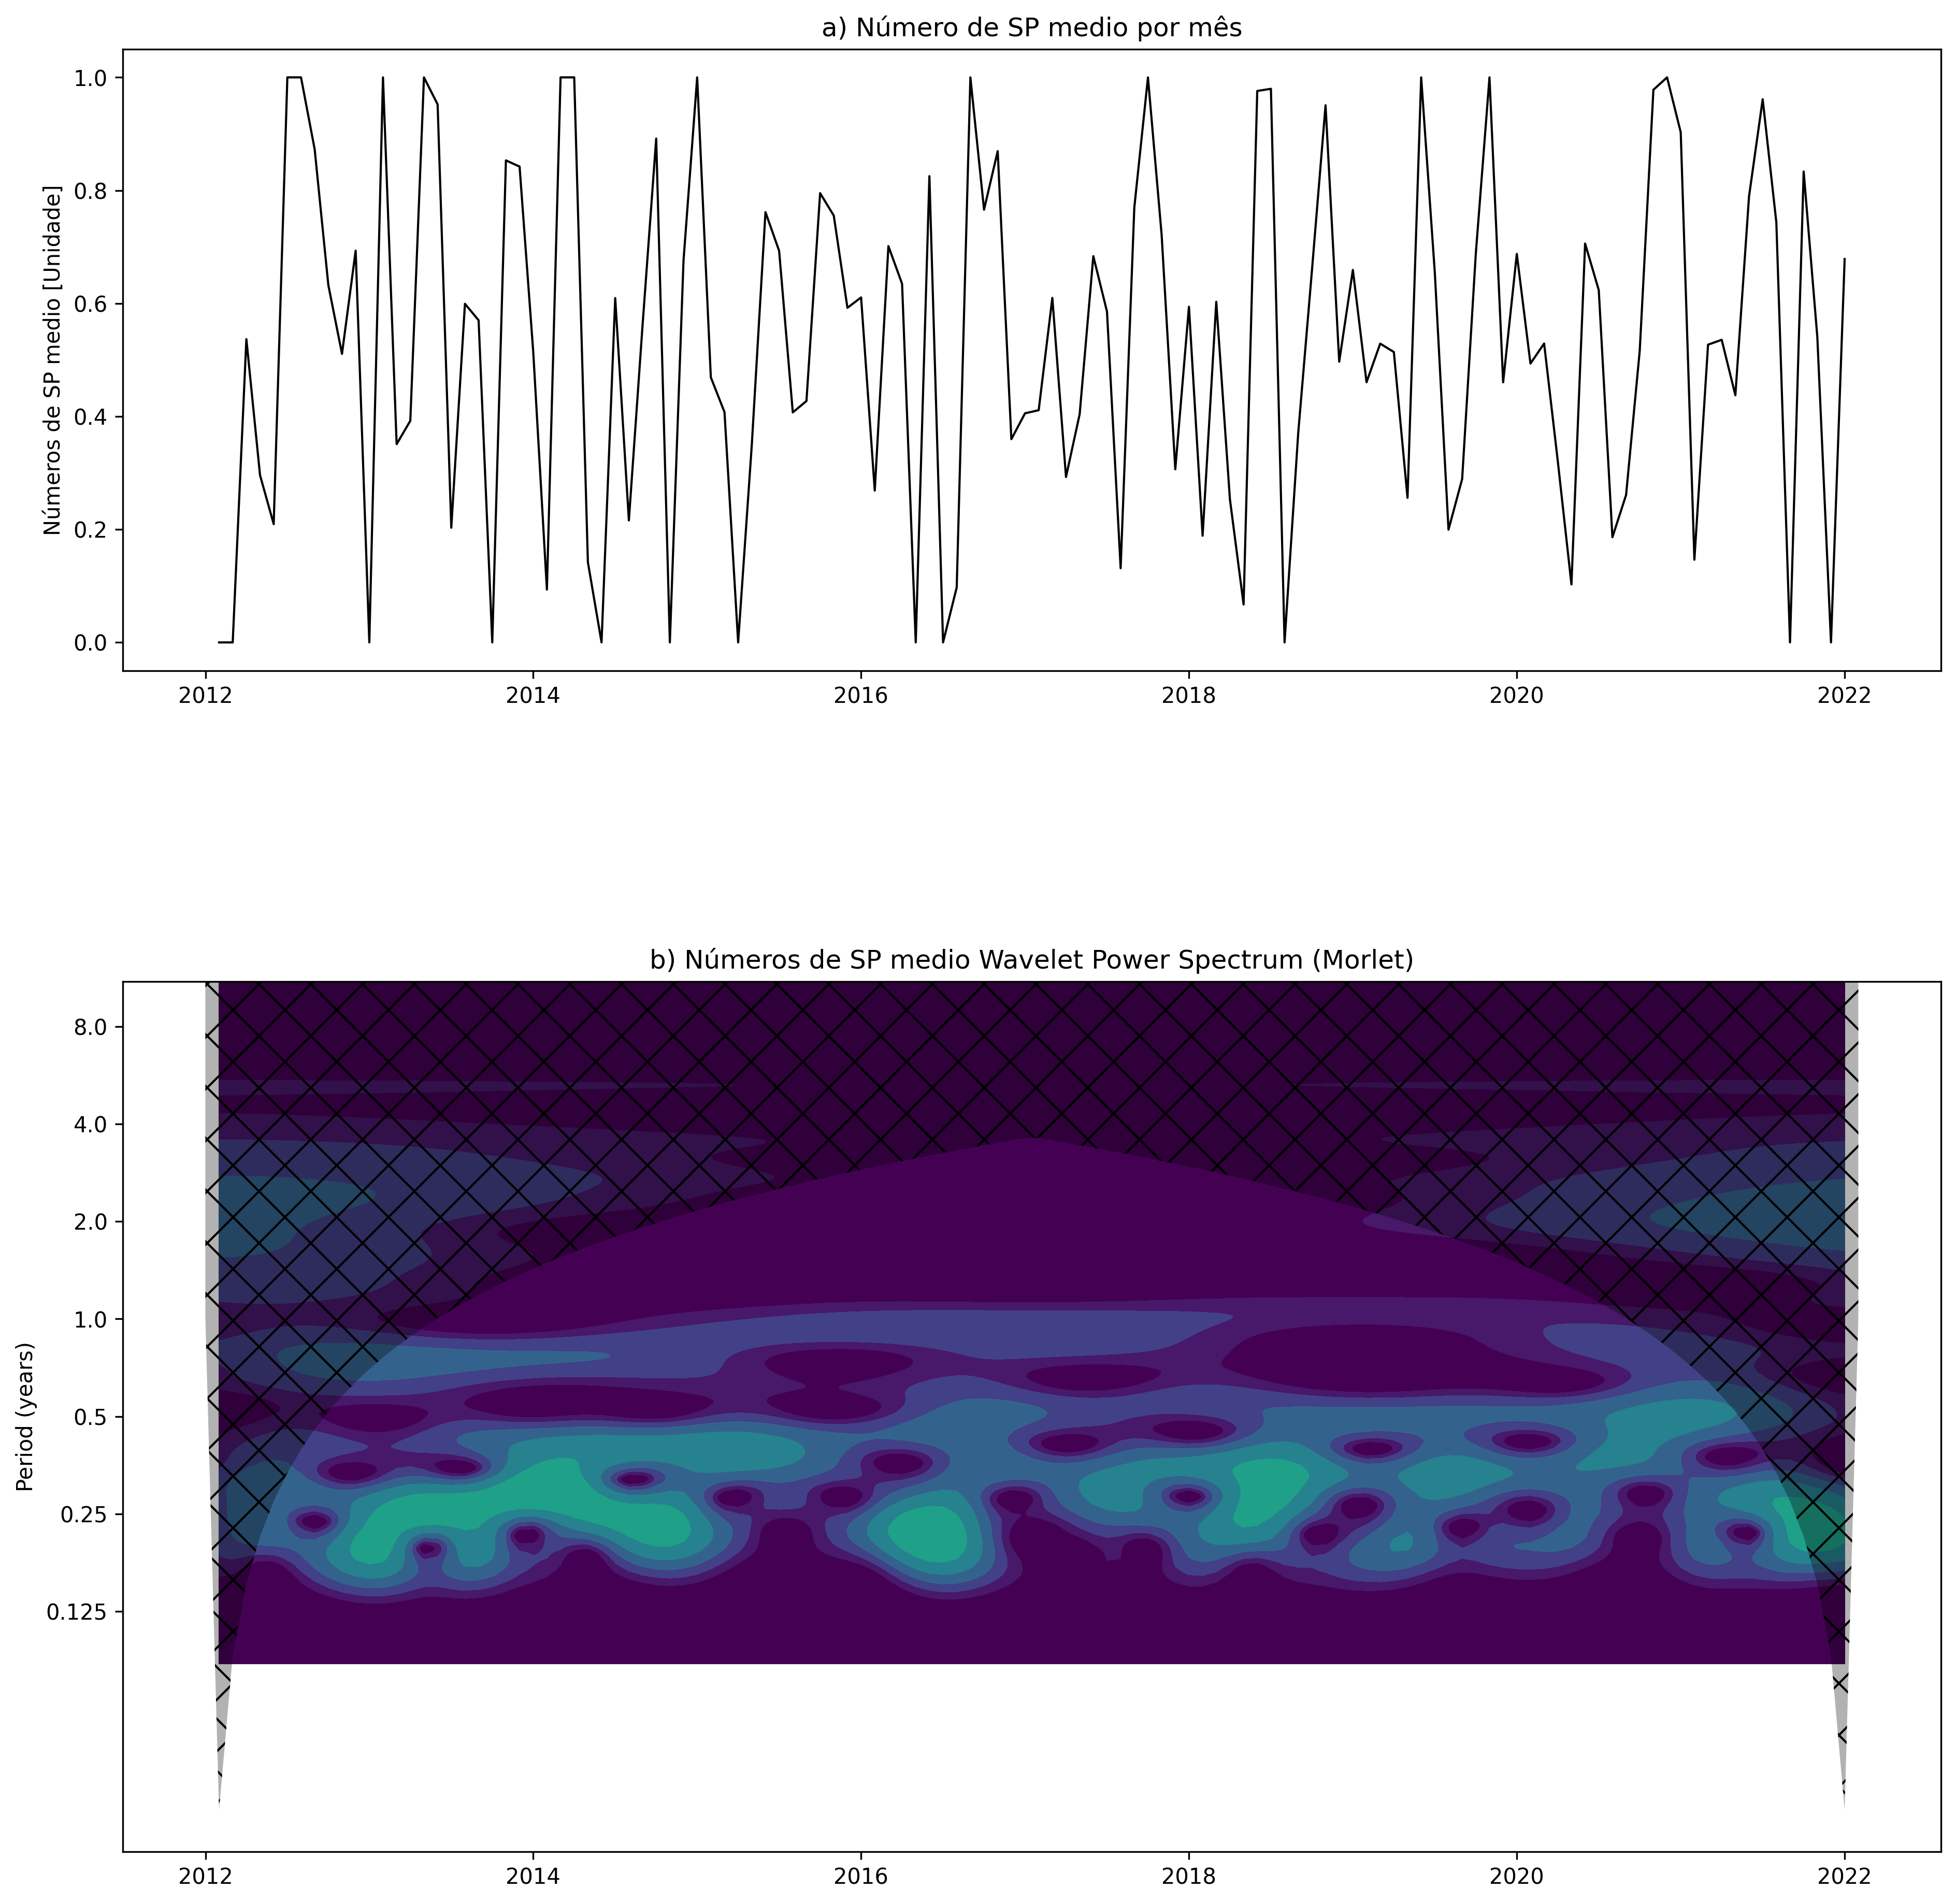

In [21]:
#figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(18, 20), dpi=300)
fig = pyplot.figure(**figprops)

#original timeseries
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, dat, 'k', linewidth=1.)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

#normalized wavelet power spectrum
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

pyplot.show()